***
## Libraries
***

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import fitz  # PyMuPDF
import uuid # for generating unique identifiers for each paper

***
## Important paths
***

In [309]:
# Base path to folder where output files will be stored
output_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/database_analysis_output/outputs/'

# Base path to folders 
base_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/'

# Path to the MICCAI 2023 pdfs
pdf_path = base_path + 'miccai_2023/'

# Path to the MICCAI 2023 database of all 730 papers and their metadata
database_path = base_path + 'databases/'

***
### Dataframe 1: MICCAI 2023
***

In [4]:
df_miccai = pd.read_csv(database_path +'database_miccai_2023.csv', index_col=[0], header=[0], encoding='utf-8')

In [693]:
df_miccai.info()

#731 entries, 0 to 730 
#6 columns in total
#title, authors, page numbers, doi, year of publication, part of publication
#dtype: int64(2), object(4)

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                731 non-null    object
 1   Authors              731 non-null    object
 2   Page numbers         731 non-null    object
 3   DOI                  731 non-null    object
 4   Year of publication  731 non-null    int64 
 5   Part of publication  731 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 40.0+ KB


There is a total of 730 papers in MICCAI 2023. However, the dataframe contains 731. Examining the dataframe, 
I will first look into the number of papers by publication (Part of Publication)

In [694]:
df_miccai.head()

,Title,Authors,Page numbers,DOI,Year of publication,Part of publication
0,PET-Diffusion: Unsupervised PET Enhancement Ba...,"Caiwen Jiang, Yongsheng Pan, Mianxin Liu, Lei ...",3-12,10.1007/978-3-031-43907-0_1,2023,1
1,MedIM: Boost Medical Image Representation via ...,"Yutong Xie, Lin Gu, Tatsuya Harada, Jianpeng Z...",13-23,10.1007/978-3-031-43907-0_2,2023,1
2,UOD: Universal One-Shot Detection of Anatomica...,"Heqin Zhu, Quan Quan, Qingsong Yao, Zaiyi Liu,...",24-34,10.1007/978-3-031-43907-0_3,2023,1
3,S2^2ME: Spatial-Spectral Mutual Teaching and E...,"An Wang, Mengya Xu, Yang Zhang, Mobarakol Isla...",35-45,10.1007/978-3-031-43907-0_4,2023,1
4,Modularity-Constrained Dynamic Representation ...,"Qianqian Wang, Mengqi Wu, Yuqi Fang, Wei Wang,...",46-56,10.1007/978-3-031-43907-0_5,2023,1


In [697]:
title_list_2023 = df_miccai['Title'].tolist()
title_list_2023[:5]

['PET-Diffusion: Unsupervised PET Enhancement Based on\xa0the\xa0Latent Diffusion Model',
 'MedIM: Boost Medical Image Representation via\xa0Radiology Report-Guided Masking',
 'UOD: Universal One-Shot Detection of\xa0Anatomical Landmarks',
 'S2^2ME: Spatial-Spectral Mutual Teaching and\xa0Ensemble Learning for\xa0Scribble-Supervised Polyp Segmentation',
 'Modularity-Constrained Dynamic Representation Learning for Interpretable Brain Disorder Analysis with Functional MRI']

In [698]:
# count the number of papers for each publication. There is 10 publications in total

print('Number of papers in Publication 1:', df_miccai['Part of publication'].value_counts()[1]) #73
print('Number of papers in Publication 2:', df_miccai['Part of publication'].value_counts()[2]) #74
print('Number of papers in Publication 3:', df_miccai['Part of publication'].value_counts()[3]) #72
print('Number of papers in Publication 4:', df_miccai['Part of publication'].value_counts()[4]) #75
print('Number of papers in Publication 5:', df_miccai['Part of publication'].value_counts()[5]) #76
print('Number of papers in Publication 6:', df_miccai['Part of publication'].value_counts()[6]) #77
print('Number of papers in Publication 7:', df_miccai['Part of publication'].value_counts()[7]) #75
print('Number of papers in Publication 8:', df_miccai['Part of publication'].value_counts()[8]) #65
print('Number of papers in Publication 9:', df_miccai['Part of publication'].value_counts()[9]) #70
print('Number of papers in Publication 10:', df_miccai['Part of publication'].value_counts()[10]) #74

# count the total number of papers in the dataframe
print('Total number of papers:', df_miccai['Part of publication'].value_counts().sum()) #731

Number of papers in Publication 1: 73
Number of papers in Publication 2: 74
Number of papers in Publication 3: 72
Number of papers in Publication 4: 75
Number of papers in Publication 5: 76
Number of papers in Publication 6: 77
Number of papers in Publication 7: 75
Number of papers in Publication 8: 65
Number of papers in Publication 9: 70
Number of papers in Publication 10: 74
Total number of papers: 731


***
### Dataframe 1: MICCAI 2023 cancer papers by title
***

In [699]:
# selecting papers with cancer in the title, add them into a new dataframe
df_cancer = df_miccai.loc[df_miccai.Title.str.contains('Cancer', regex=False, na=False)]

print(len(df_cancer)) # 23 papers with cancer in the title

# saving dataframe for papers with cancer in the title
# df_cancer.to_csv(database_path +'database_miccai_2023_cancer.csv', index=True, header=True, encoding='utf-8')

23


In [700]:
title_list_cancer = df_cancer["Title"]
author_list_cancer = df_cancer["Authors"]

author_list_cancer = author_list_cancer.to_list()
title_list_cancer = title_list_cancer.to_list()

In [701]:
print(len(author_list_cancer)) #23
print(len(title_list_cancer))  #23

23
23


***
## **Selecting a scope of papers from MICCAI 2023**
***
***

**Scope criteria:** Selecting papers, that researched within the field of cancer-related illnesses by searching for cancer-related keywords in the text of each research paper. The text is defined from the start of Abstraction ending with the last line of Conclusion, exluding the Title of the paper, the authors and affiliations, the Acknowlegdement and the References. 

Cancer-related keywords could be words such as 'cancer', 'tumor' and/or 'tumours'.


In [5]:
# Function to extract the full text from the PDF
def extract_text(pdf_path):
    with fitz.open(pdf_path) as doc:
        full_text = ""
        for page in doc:
            full_text += page.get_text()
    return full_text

# Function to find if any of the keywords appear in the section between Abstract and Conclusion
def find_keywords_section(full_text, keywords):
     # Use regular expressions to find the end of the affiliations section
    affiliations_end = re.search(r'\d{1,2}\s+(?:\w+\.)+@\w+\.\w{2,}', full_text)
    
    # Start searching from the end of affiliations if found, otherwise from the start of the text
    start_idx = affiliations_end.end() if affiliations_end else 0
    
    # Look for the Abstract and Conclusion sections
    abstract_idx = full_text.lower().find("abstract", start_idx)
    conclusion_idx = full_text.lower().rfind("conclusion", abstract_idx)
    acknowledgements_idx = full_text.lower().find("acknowledgements", conclusion_idx)
    
    # Adjust the end index to stop at Acknowledgements if it exists, otherwise use Conclusion index
    end_search_idx = acknowledgements_idx if acknowledgements_idx != -1 else conclusion_idx
    
    # If neither Abstract nor Conclusion is found, search the entire text
    if abstract_idx == -1 and conclusion_idx == -1:
        searchable_text = full_text[start_idx:]
    else:
        # Search from Abstract to Conclusion or Acknowledgements
        searchable_text = full_text[abstract_idx:end_search_idx].lower()
    
    # Search for each keyword within the determined section, stop at first match
    for keyword in keywords:
        if keyword.lower() in searchable_text:
            return True
    return False

# Function to extract the title from the PDF
def extract_title(pdf_path):
    with fitz.open(pdf_path) as doc:
        first_page_text = doc[0].get_text("text")
        
        # Regular expression to find the start of affiliations or author names
        # Looks for sequences typical in author lists or affiliations, such as numbers and parentheses
        author_or_affiliations_start = re.search(r'\b[A-Z][a-z]+ [A-Z]\.|\b[A-Z][a-z]+\s[A-Z][a-z]+[1-9]', first_page_text)

        title = ""
        if author_or_affiliations_start:
            # Extract text up to the start of the author list or affiliations as potential title text
            potential_title_text = first_page_text[:author_or_affiliations_start.start()].strip()
            title_lines = potential_title_text.split('\n')
            
            # The title is expected to be a continuous block of text at the top of the page,
            # possibly after a journal header or similar. We look for a large continuous block of text.
            for line in reversed(title_lines):
                if line.strip():  # Non-empty line suggests part of the title
                    # Prepend to keep the title in the correct order
                    title = line + " " + title
                else:
                    # An empty line might indicate the end of the title block
                    break
        else:
            # If no author list or affiliation section is identified, use the first non-empty line
            for line in first_page_text.split('\n'):
                if line.strip():
                    title = line
                    break

        title = title.strip()  # Clean up whitespace
        return title

selected_papers = []
titles = []

# List of keywords to search for
keywords = ["cancer"]

# Iterate over each volume and search for keywords
for i in range(1, 11):  # Volumes 1 to 10
    folder_name = f"miccai23vol{i}"
    folder_path = os.path.join(pdf_path, folder_name)
    
    for pdf in os.listdir(folder_path):
        if pdf.endswith(".pdf"):
            pdf_path_ = os.path.join(folder_path, pdf)
            full_text = extract_text(pdf_path_)
            if find_keywords_section(full_text, keywords):
                selected_papers.append(os.path.join(folder_name, pdf))

# Extract titles from selected papers
for paper_path in selected_papers:
    full_paper_path = os.path.join(pdf_path, paper_path)
    title = extract_title(full_paper_path)
    titles.append(title)

print(f"Extracted titles from {len(titles)} selected papers.")
print(f"With the keyword(s) being {keywords}, {len(selected_papers)} papers were selected as relevant to cancer research.")



Extracted titles from 189 selected papers.
With the keyword(s) being ['cancer'], 189 papers were selected as relevant to cancer research.


In [224]:
# # # Save the selected papers and their paths to a CSV file
# selected_papers_path = pd.DataFrame({"Path": selected_papers, "Title": titles})
# selected_papers_path.to_csv(output_path + 'papers_by_paths_titles.csv', index=False)

In [709]:
# # Save the extracted titles to a CSV file
# titles = pd.DataFrame({'Title': titles})
# titles
# titles.to_csv(output_path + 'titles.csv', index=False, header=True, encoding='utf-8')

In [710]:
# # Load the datasets
# titles_df = pd.read_csv(output_path + 'titles.csv')
# database_df = df_miccai

,Title
0,Geometry-Invariant Abnormality
1,3D Arterial Segmentation via Single 2D Project...
2,TPRO: Text-Prompting-Based Weakly Supervised H...
3,vox2vec: A Framework for Self-supervised Contr...
4,Pick the Best Pre-trained Model: Towards Trans...
...,...
184,Solving Low-Dose CT Reconstruction
185,Noise2Aliasing: Unsupervised Deep Learning for...
186,Revealing Anatomical Structures in PET to Gene...
187,Geometric Ultrasound Localization


In [711]:
# # Create a search pattern from the first two words of each title
# titles_df['search_pattern'] = titles_df['Title'].str.split().str.slice(0, 2).str.join(' ').str.lower()

# # Find the rows in the database that match the search pattern
# matched_rows = []
# for pattern in titles_df['search_pattern']:
#     matched_rows.extend(database_df[database_df['Title'].str.lower().str.startswith(pattern)].index.tolist())
# matched_df = database_df.loc[matched_rows]

# # Save the matched papers and the search pattern to CSV files
# matched_df.to_csv(output_path + 'matched_papers.csv', index=False) #187 rows, missing two papers
# titles_df.to_csv(output_path + 'search_pattern.csv') # 189 titles

In [14]:
# matched_df = pd.read_csv(output_path + 'matched_papers.csv')

#### Hard coding: adding the two missing papers into the dataframe "matched_df"

In [12]:
# # Locating the missing papers in the original database for all 730 papers 
# missing_papers = df_miccai.loc[df_miccai['Title'].isin(
#     ['PET-Diffusion: Unsupervised PET Enhancement Based on the Latent Diffusion Model', 
#      'S2^2ME: Spatial-Spectral Mutual Teaching and Ensemble Learning for Scribble-Supervised Polyp Segmentation'])]

# missing_papers

,Title,Authors,Page numbers,DOI,Year of publication,Part of publication
0,PET-Diffusion: Unsupervised PET Enhancement Ba...,"Caiwen Jiang, Yongsheng Pan, Mianxin Liu, Lei ...",3-12,10.1007/978-3-031-43907-0_1,2023,1
3,S2^2ME: Spatial-Spectral Mutual Teaching and E...,"An Wang, Mengya Xu, Yang Zhang, Mobarakol Isla...",35-45,10.1007/978-3-031-43907-0_4,2023,1


In [175]:
# Merge the matched and missing papers into a single dataframe
#selected_papers_df = pd.merge(matched_df, missing_papers, on='Title', how='outer')

# Drop the duplicate columns from the merge
#selected_papers_df.drop(columns=['Part of publication_y', 'Authors_y', 'Page numbers_y', 'DOI_y','Year of publication_y'], inplace=True)
#selected_papers_df.drop(columns=['Page numbers_y', 'DOI_y', 'Year of publication_y'], inplace=True)

# Rename/refine the columns to match the original database 
#selected_papers_df.rename(columns={'Title': 'title', 'Part of publication_x': 'vol_number', 'Authors_x': 'authors', 
#                                   'DOI_x': 'doi', 'Year of publication_x': 'publication_year',
#                                   'Page numbers_x': 'page_numbers'}, inplace=True)

In [177]:
# Save the selected papers to a CSV file
#selected_papers_df.to_csv(output_path + 'selected_papers.csv', index=False)

In [181]:
# # Display the selected papers
# ''' The papers were choosen by searching for papers with the keyword "cancer" in the title and in the text starting from the abstract and 
# ending with the conclusion section of the paper'''

# selected_papers_df = pd.read_csv(output_path + 'selected_papers.csv')
# selected_papers_df

,title,authors,page_numbers,doi,publication_year,vol_number
0,3D Arterial Segmentation via Single 2D Project...,"Alina F. Dima, Veronika A. Zimmer, Martin J. M...",141-151,10.1007/978-3-031-43907-0_14,2023.0,1.0
1,3D Mitochondria Instance Segmentation with Spa...,"Omkar Thawakar, Rao Muhammad Anwer, Jorma Laak...",613-623,10.1007/978-3-031-43993-3_59,2023.0,8.0
2,A Spatial-Temporal Deformable Attention Based ...,"Chao Qin, Jiale Cao, Huazhu Fu, Rao Muhammad A...",479-488,10.1007/978-3-031-43895-0_45,2023.0,2.0
3,A Spatial-Temporally Adaptive PINN Framework f...,"Yubo Ye, Huafeng Liu, Xiajun Jiang, Maryam Tol...",163-172,10.1007/978-3-031-43990-2_16,2023.0,7.0
4,A Texture Neural Network to Predict the Abnorm...,"Weiguo Cao, Benjamin Howe, Nicholas Rhodes, Su...",470-480,10.1007/978-3-031-43993-3_46,2023.0,8.0
...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,"Jun Wei, Yiwen Hu, Shuguang Cui, S. Kevin Zhou...",757-766,10.1007/978-3-031-43898-1_72,2023.0,3.0
185,Weakly-Supervised Positional Contrastive Learn...,"Emma Sarfati, Alexandre Bône, Marc-Michel Rohé...",227-237,10.1007/978-3-031-43907-0_22,2023.0,1.0
186,X2Vision: 3D CT Reconstruction from Biplanar X...,"Alexandre Cafaro, Quentin Spinat, Amaury Leroy...",699-709,10.1007/978-3-031-43999-5_66,2023.0,10.0
187,YONA: You Only Need One Adjacent Reference-Fra...,"Yuncheng Jiang, Zixun Zhang, Ruimao Zhang, Gua...",44-54,10.1007/978-3-031-43904-9_5,2023.0,5.0


***
***

# **Preliminary analysis of MICCAI 2023 - Selected papers**

***

### Step 1: Preprocessing and Data Extraction

- **Objective**: Extract relevant information (e.g., mentions of demographic data, ethical considerations, methodologies for bias mitigation) from the papers.

In [20]:
# Setup and installation of the required packages
#!pip install spacy nltk PyMuPDF
#!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.8 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2023.12.25-cp39-cp39-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.9 MB/s eta 0:00:00a 0:00:01m
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.8 MB/s eta 0:00:00a 0:00:01
Using cached regex-2023.12.25-cp39-cp39-macosx_11_0_arm64.whl (291 kB)
   ━━━━━━━━━

In [ ]:
# Store the paths to the selected papers
selected_papers_paths = []
for i in range(0, len(selected_papers)):  # Volumes 1 to 10
    selected_papers_paths.append([base_path + 'miccai_2023/' + selected_papers[i]])

# Check if the total number of paths is equal to the number of selected papers
len(selected_papers_paths)

In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### Step 2: PDF Text Extraction


In [59]:
# Function to extract the full text from the PDF
def extract_text(pdf_path):
    with fitz.open(pdf_path) as doc:
        full_text = ""
        for page in doc:
            full_text += page.get_text()
            # Use regular expressions to find the end of the affiliations section
            affiliations_end = re.search(r'\d{1,2}\s+(?:\w+\.)+@\w+\.\w{2,}', full_text)
            
            # Start searching from the end of affiliations if found, otherwise from the start of the text
            start_idx = affiliations_end.end() if affiliations_end else 0
            
            # Look for the Abstract and Conclusion sections
            abstract_idx = full_text.lower().find("abstract", start_idx)
            conclusion_idx = full_text.lower().rfind("conclusion", abstract_idx)
            acknowledgements_idx = full_text.lower().find("acknowledgements", conclusion_idx)
            
            # Adjust the end index to stop at Acknowledgements if it exists, otherwise use Conclusion index
            end_search_idx = acknowledgements_idx if acknowledgements_idx != -1 else conclusion_idx
            
            # If neither Abstract nor Conclusion is found, search the entire text
            if abstract_idx == -1 and conclusion_idx == -1:
                searchable_text = full_text[start_idx:]
            else:
                # Search from Abstract to Conclusion or Acknowledgements
                searchable_text = full_text[abstract_idx:end_search_idx].lower()          
        
    return searchable_text

def extract_relevant_sentences(text, keywords):
    relevant_sentences = []
    doc = nlp(text)
    # Compile a regex pattern that matches whole words from the keywords list, case insensitive
    pattern = r'\b(' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'
    for sent in doc.sents:
        if re.search(pattern, sent.text, re.IGNORECASE):
            relevant_sentences.append(sent.text.strip())
    return relevant_sentences

#### Step 3: Text Preprocessing

In [58]:
def preprocess_text(text):
    doc = nlp(text)
    # Optionally, further preprocessing steps like removing stopwords, lemmatization, etc., can be added here
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

#### Step 4: Extracting Relevant Information
For the purpose of extracting relevant information about demographic data, ethical considerations, and methodologies for bias mitigation, keywords or phrases that signify these concepts are defined, and search for sentences containing these keywords:

In [292]:
# 5th and final attempt: saved as extracted_info.csv
keywords = ['age', 'gender', 'sex', 'women', 'woman', 'female', 'men', 'man', 'male',
            'location', 'geolocation', 'geographical', 'geographic', 'country', 'countries',
             'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'society', 'societies',
             'etnicity', 'etnicities', 'race', 'bias', 'biases', 'fairness', 'transparency', 
             'data gap', 'data gaps', 'data bias', 'data biases']

In [293]:
# Initialize an empty dictionary to hold the extracted info
extracted_info = {}

for pdf_path in selected_papers_paths:
    path = pdf_path[0]  # Assuming pdf_path is a list with the first element being the file path
    text = extract_text(path)
    relevant_sentences = extract_relevant_sentences(text, keywords)
    
    # Even if no relevant sentences were extracted, include the paper with extracted_sentence set to None
    if not relevant_sentences:
        extracted_info[path] = [None]  # Or use [0] if you prefer to indicate absence with 0
    else:
        extracted_info[path] = relevant_sentences
# Convert to DataFrame
rows = []
for paper_id, sentences in extracted_info.items():
    if sentences == [None]:  # Check if the list contains only None, indicating no sentences were extracted
        rows.append({'paper_id': paper_id, 'extracted_sentence': None})
    else:
        for sentence in sentences:
            rows.append({'paper_id': paper_id, 'extracted_sentence': sentence})

extracted_info_df = pd.DataFrame(rows)

# Save to CSV
extracted_info_df.to_csv(output_path + 'extracted_info.csv', index=False)


***
### Step 2: Structuring Data According to Key Indicators

Objective: Organize extracted information under the key indicators.

In [317]:
selected_papers_df = pd.read_csv(output_path + 'selected_papers_final.csv')

In [318]:
extracted_info # Dictionary with the extracted info {<pdf_path>: [<extracted_sentences by keyword>]}
selected_papers # List of path of selected papers with the keyword 'cancer' in the text
df_miccai # Dataframe with the metadata of all 730 papers
selected_papers_df # Dataframe with the metadata of the selected papers and paper_id as index

,title,authors,page_numbers,doi,publication_year,vol_number
0,3D Arterial Segmentation via Single 2D Project...,"Alina F. Dima, Veronika A. Zimmer, Martin J. M...",141-151,10.1007/978-3-031-43907-0_14,2023,1
1,3D Mitochondria Instance Segmentation with Spa...,"Omkar Thawakar, Rao Muhammad Anwer, Jorma Laak...",613-623,10.1007/978-3-031-43993-3_59,2023,8
2,A Spatial-Temporal Deformable Attention Based ...,"Chao Qin, Jiale Cao, Huazhu Fu, Rao Muhammad A...",479-488,10.1007/978-3-031-43895-0_45,2023,2
3,A Spatial-Temporally Adaptive PINN Framework f...,"Yubo Ye, Huafeng Liu, Xiajun Jiang, Maryam Tol...",163-172,10.1007/978-3-031-43990-2_16,2023,7
4,A Texture Neural Network to Predict the Abnorm...,"Weiguo Cao, Benjamin Howe, Nicholas Rhodes, Su...",470-480,10.1007/978-3-031-43993-3_46,2023,8
...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,"Jun Wei, Yiwen Hu, Shuguang Cui, S. Kevin Zhou...",757-766,10.1007/978-3-031-43898-1_72,2023,3
185,Weakly-Supervised Positional Contrastive Learn...,"Emma Sarfati, Alexandre Bône, Marc-Michel Rohé...",227-237,10.1007/978-3-031-43907-0_22,2023,1
186,X2Vision: 3D CT Reconstruction from Biplanar X...,"Alexandre Cafaro, Quentin Spinat, Amaury Leroy...",699-709,10.1007/978-3-031-43999-5_66,2023,10
187,YONA: You Only Need One Adjacent Reference-Fra...,"Yuncheng Jiang, Zixun Zhang, Ruimao Zhang, Gua...",44-54,10.1007/978-3-031-43904-9_5,2023,5


In [319]:
# print(selected_papers_df.info())
# # Convert dtype from float to int

# selected_papers_df['vol_number'] = selected_papers_df['vol_number'].astype(int)
# selected_papers_df['publication_year'] = selected_papers_df['publication_year'].astype(int)
# selected_papers_df.info()
# selected_papers_df.to_csv(output_path + 'selected_papers_final.csv', index=False)

In [320]:
# Create a new column with unique identifiers for each paper

# Option 1: Using the uuid as the unique identifier
#df['paper_id'] = [uuid.uuid4() for _ in range(len(df))]
#selected_papers_df['paper_id'] = [uuid.uuid4() for _ in range(len(selected_papers_df))]
#selected_papers_df.to_csv(output_path + 'selected_papers_unique_ids.csv', index=False)


# Option 2: Using the index as the unique identifier
#df['paper_id'] = range(1, len(df) + 1)
# selected_papers_df['paper_id'] = range(1, len(selected_papers_df) + 1)
# selected_papers_df.to_csv(output_path + 'selected_papers_index_as_ids.csv', index=False)

In [333]:
papers = pd.read_csv(output_path + 'selected_papers_index_as_ids.csv')
# Specify the column you want to move to the first position
column_to_move = 'paper_id'

# Create a new list of column names with the specified column first
new_columns = [column_to_move] + [col for col in papers.columns if col != column_to_move]

# Reindex the DataFrame with the new column order
papers = papers[new_columns]

,paper_id,title,authors,page_numbers,doi,publication_year,vol_number
0,1,3D Arterial Segmentation via Single 2D Project...,"Alina F. Dima, Veronika A. Zimmer, Martin J. M...",141-151,10.1007/978-3-031-43907-0_14,2023,1
1,2,3D Mitochondria Instance Segmentation with Spa...,"Omkar Thawakar, Rao Muhammad Anwer, Jorma Laak...",613-623,10.1007/978-3-031-43993-3_59,2023,8
2,3,A Spatial-Temporal Deformable Attention Based ...,"Chao Qin, Jiale Cao, Huazhu Fu, Rao Muhammad A...",479-488,10.1007/978-3-031-43895-0_45,2023,2
3,4,A Spatial-Temporally Adaptive PINN Framework f...,"Yubo Ye, Huafeng Liu, Xiajun Jiang, Maryam Tol...",163-172,10.1007/978-3-031-43990-2_16,2023,7
4,5,A Texture Neural Network to Predict the Abnorm...,"Weiguo Cao, Benjamin Howe, Nicholas Rhodes, Su...",470-480,10.1007/978-3-031-43993-3_46,2023,8
...,...,...,...,...,...,...,...
184,185,WeakPolyp: You only Look Bounding Box for Poly...,"Jun Wei, Yiwen Hu, Shuguang Cui, S. Kevin Zhou...",757-766,10.1007/978-3-031-43898-1_72,2023,3
185,186,Weakly-Supervised Positional Contrastive Learn...,"Emma Sarfati, Alexandre Bône, Marc-Michel Rohé...",227-237,10.1007/978-3-031-43907-0_22,2023,1
186,187,X2Vision: 3D CT Reconstruction from Biplanar X...,"Alexandre Cafaro, Quentin Spinat, Amaury Leroy...",699-709,10.1007/978-3-031-43999-5_66,2023,10
187,188,YONA: You Only Need One Adjacent Reference-Fra...,"Yuncheng Jiang, Zixun Zhang, Ruimao Zhang, Gua...",44-54,10.1007/978-3-031-43904-9_5,2023,5


In [344]:
# # Load the papers and title_paths dataframes to give each paper a unique identifier
# title_paths = pd.read_csv(output_path + 'papers_by_paths_titles.csv', header=[0], encoding='utf-8').sort_values(by='title')
# title_paths['paper_id'] = range(1, len(title_paths) + 1)
# title_paths
# # Merge the papers and title_paths dataframes
# papers_df = pd.merge(papers, title_paths, on='paper_id', how='inner').drop(columns=['title_y']).rename(columns={'title_x': 'title'})
# papers_df.to_csv(output_path + 'papers_df.csv', index=False)
# extracted_info_df = pd.read_csv(output_path + 'extracted_info.csv')

# # Split the 'path' column and keep only the last two parts
# extracted_info_df['path'] = extracted_info_df['paper_id'].str.split('/').apply(lambda x: '/'.join(x[-2:]))
# extracted_info_df = extracted_info_df.drop(columns=['paper_id'])
# papers_sent = pd.merge(papers_df, extracted_info_df, on='path',  how='inner')
# papers_sent.to_csv(output_path + 'papers_sent.csv', index=False)
# papers_sent = pd.read_csv(output_path + 'papers_sent.csv')
# papers_sent.drop(columns=['path', 'authors', 'page_numbers', 'doi', 'publication_year'], inplace=True)

In [348]:
papers_sent = pd.read_csv(output_path + 'papers_sent.csv')
#df.fillna('None', inplace=True)
papers_sent.fillna('None', inplace=True)
papers_sent

,paper_id,title,authors,page_numbers,doi,publication_year,vol_number,path,extracted_sentence
0,1,3D Arterial Segmentation via Single 2D Project...,"Alina F. Dima, Veronika A. Zimmer, Martin J. M...",141-151,10.1007/978-3-031-43907-0_14,2023,1,miccai23vol1/paper_14.pdf,for each foreground pixel in the annotation a ...
1,1,3D Arterial Segmentation via Single 2D Project...,"Alina F. Dima, Veronika A. Zimmer, Martin J. M...",141-151,10.1007/978-3-031-43907-0_14,2023,1,miccai23vol1/paper_14.pdf,the cohort consists of 141 patients with pancr...
2,2,3D Mitochondria Instance Segmentation with Spa...,"Omkar Thawakar, Rao Muhammad Anwer, Jorma Laak...",613-623,10.1007/978-3-031-43993-3_59,2023,8,miccai23vol8/paper_59.pdf,None
3,3,A Spatial-Temporal Deformable Attention Based ...,"Chao Qin, Jiale Cao, Huazhu Fu, Rao Muhammad A...",479-488,10.1007/978-3-031-43895-0_45,2023,2,miccai23vol2/paper_46.pdf,None
4,4,A Spatial-Temporally Adaptive PINN Framework f...,"Yubo Ye, Huafeng Liu, Xiajun Jiang, Maryam Tol...",163-172,10.1007/978-3-031-43990-2_16,2023,7,miccai23vol8/paper_46.pdf,2\nmaterials and method\n2.1\ndataset preparat...
...,...,...,...,...,...,...,...,...,...
532,185,WeakPolyp: You only Look Bounding Box for Poly...,"Jun Wei, Yiwen Hu, Shuguang Cui, S. Kevin Zhou...",757-766,10.1007/978-3-031-43898-1_72,2023,3,miccai23vol3/paper_72.pdf,our weakpolyp predictably outperforms the mode...
533,186,Weakly-Supervised Positional Contrastive Learn...,"Emma Sarfati, Alexandre Bône, Marc-Michel Rohé...",227-237,10.1007/978-3-031-43907-0_22,2023,1,miccai23vol1/paper_22.pdf,None
534,187,X2Vision: 3D CT Reconstruction from Biplanar X...,"Alexandre Cafaro, Quentin Spinat, Amaury Leroy...",699-709,10.1007/978-3-031-43999-5_66,2023,10,miccai23vol10/paper_66.pdf,None
535,188,YONA: You Only Need One Adjacent Reference-Fra...,"Yuncheng Jiang, Zixun Zhang, Ruimao Zhang, Gua...",44-54,10.1007/978-3-031-43904-9_5,2023,5,miccai23vol5/paper_5.pdf,"for the fairness of the experiments, we keep t..."


In [352]:
import pandas as pd
from collections import Counter

# Function to count keywords in a text
def count_keywords(text, keywords):
    # Create a Counter object to count occurrences of each keyword
    counts = Counter()
    for keyword in keywords:
        # Count occurrences of the keyword in the text
        counts[keyword] = text.lower().count(keyword)
    return counts

# Aggregate 'extracted_sentences' for each 'title' and count keywords
results = {}
for title, group in papers_sent.groupby('title'):
    # Combine all extracted sentences into one large text block
    aggregated_text = " ".join(group['extracted_sentence'].tolist())
    # Count the keywords in this aggregated text
    keyword_counts = count_keywords(aggregated_text, keywords)
    # Store the result
    results[title] = keyword_counts

# Convert the results dictionary to a DataFrame for easy viewing/manipulation
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv(output_path + 'results_df.csv', index=True)

In [407]:
# results_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)

# # Example of calculating a simple score by summing counts of selected keywords
# keywords_for_scoring = keywords
# results_df['score'] = results_df[keywords_for_scoring].sum(axis=1)

# # Example of flagging papers for review based on a score threshold
# review_threshold = 5  # Papers with scores below this threshold require review
# results_df['requires_review'] = results_df['score'] > review_threshold
# results_df.to_csv(output_path + 'results_df.csv', index=True)

In [418]:
# results_df = pd.read_csv(output_path + 'results_df.csv')
# results_df.drop(columns=['Unnamed: 0'], inplace=True)

In [408]:
# # Mapping of keywords to main categories
# keyword_to_category = {
#     'age'   : 'age_group',
#     'gender': 'gender_group',
#     'sex'   : 'gender_group',
#     'female': 'gender_group',
#     'women' : 'gender_group',
#     'woman' : 'gender_group',
#     'men'   : 'gender_group',
#     'man'   : 'gender_group',
#     'male'  : 'gender_group',
#     'location'      : 'geolocation_group',
#     'geolocation'   : 'geolocation_group',
#     'geographical'  : 'geolocation_group',
#     'geographic'    : 'geolocation_group',
#     'country'       : 'geolocation_group',
#     'countries'     : 'geolocation_group',
#     'city'          : 'geolocation_group',
#     'cities'        : 'geolocation_group',
#     'hospital'      : 'geolocation_group',
#     'hospitals'     : 'geolocation_group',
#     'clinic'        : 'geolocation_group',
#     'clinics'       : 'geolocation_group',
#     'society'       : 'social factors',
#     'societies'     : 'social factors',
#     'etnicity'      : 'etnicity_group',
#     'etnicities'    : 'etnicity_group',
#     'race'          : 'etnicity_group',
#     'bias'          : 'fairness_group',
#     'biases'        : 'fairness_group',
#     'fairness'      : 'fairness_group',
#     'transparency'  : 'fairness_group',
#     'data gap'      : 'data gaps_group',
#     'data gaps'     : 'data gaps_group',
#     'data bias'     : 'fairness_group',
#     'data biases'   : 'fairness_group'
# }
# # Reverse the mapping for aggregation
# category_to_keywords = {}
# for keyword, category in keyword_to_category.items():
#     category_to_keywords.setdefault(category, []).append(keyword)

# # Aggregate columns into categories
# for category, keywords in category_to_keywords.items():
#     if category in results_df.columns:
#         # If the category already exists, add to it
#         results_df[category] += results_df[keywords].sum(axis=1)
#     else:
#         # Otherwise, create a new column for the category
#         results_df[category] = results_df[keywords].sum(axis=1)
#     # Drop the original keyword columns
#     results_df.drop(columns=keywords, inplace=True)

# results_df.rename(columns={'age_group' : 'age', 'gender_group' : 'gender', 'etnicity_group': 'etnicity', 'fairness_group': 'fairness',
#                            'geolocation_group': 'geolocation',  'data gaps_group': 'data_gaps', 'score' : 'total_score'}, inplace=True)

# results_df.to_csv(output_path + 'results_df_aggregated.csv', index=True)

In [438]:
agg_results_df = pd.read_csv(base_path + 'code/database_analysis_output/finals/results_df_aggregated.csv').drop(columns=['Unnamed: 0'])
agg_results_df

,title,total_score,requires_review,age,gender,geolocation,social factors,ethnicity,fairness,data_gaps
0,3D Arterial Segmentation via Single 2D Project...,0,False,0,3,1,0,0,0,0
1,3D Mitochondria Instance Segmentation with Spa...,0,False,0,0,0,0,0,0,0
2,A Spatial-Temporal Deformable Attention Based ...,0,False,0,0,0,0,0,0,0
3,A Spatial-Temporally Adaptive PINN Framework f...,1,False,1,3,1,0,0,0,0
4,A Texture Neural Network to Predict the Abnorm...,1,False,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,0,False,0,0,0,0,0,6,0
185,Weakly-Supervised Positional Contrastive Learn...,0,False,0,0,0,0,0,0,0
186,X2Vision: 3D CT Reconstruction from Biplanar X...,0,False,0,0,0,0,0,0,0
187,YONA: You Only Need One Adjacent Reference-Fra...,0,False,0,1,0,0,0,1,0


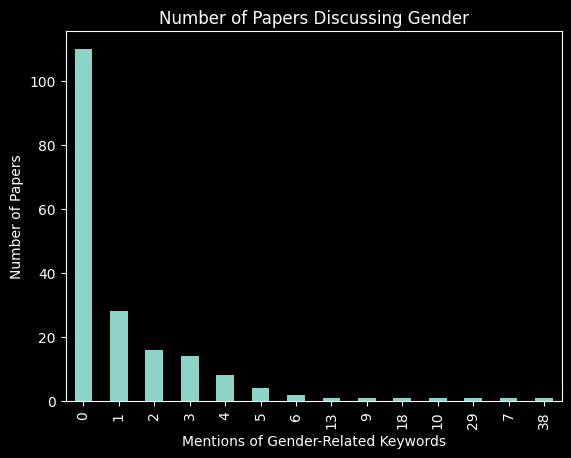

In [439]:
# Example for one category; you could create a plot for each or use subplots for all
agg_results_df['gender'].value_counts().plot(kind='bar')
plt.title('Number of Papers Discussing Gender')
plt.xlabel('Mentions of Gender-Related Keywords')
plt.ylabel('Number of Papers')
plt.show()


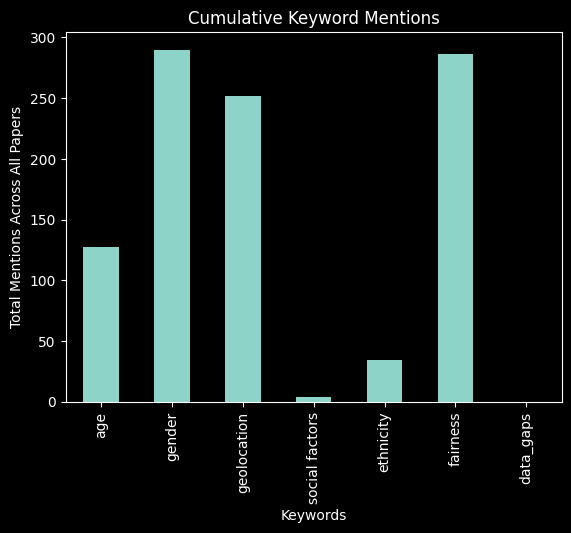

In [440]:
df_categories = agg_results_df.drop(['title', 'total_score', 'requires_review'], axis=1)
df_categories.sum().plot(kind='bar', stacked=True)
plt.title('Cumulative Keyword Mentions')
plt.xlabel('Keywords')
plt.ylabel('Total Mentions Across All Papers')
plt.show()


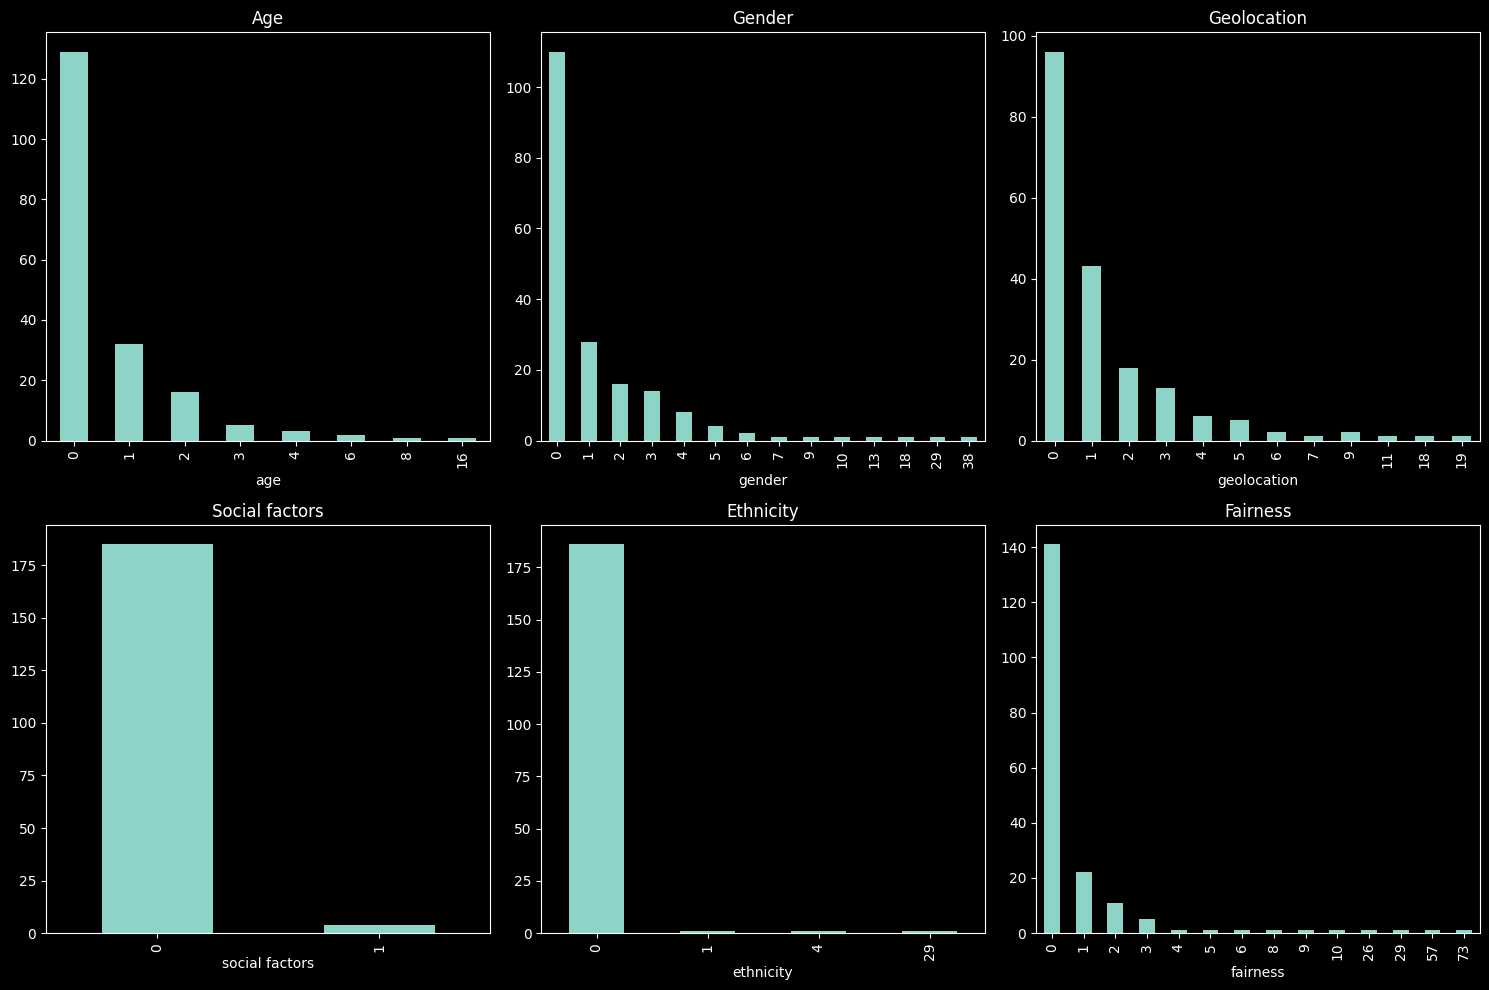

In [441]:
# Given the limitation in the live coding environment, we will write the code that you can run on your local machine.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the appropriate data already loaded.
# Specify the categories you want to plot
categories_to_plot = ['age', 'gender', 'geolocation', 'social factors', 'ethnicity', 'fairness']

# Define the number of rows and columns for the subplots based on the number of categories
num_categories = len(categories_to_plot)
num_cols = 3  # Choose the number of columns for your subplot grid
num_rows = num_categories // num_cols + (num_categories % num_cols > 0)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust figsize as necessary
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Plot a bar plot for each specified category
for i, category in enumerate(categories_to_plot):
    # Create the bar plot on the appropriate subplot
    # Note: This assumes each entry in these columns is a count. If not, adjust the plotting code accordingly.
    agg_results_df[category].value_counts().sort_index().plot(kind='bar', ax=axs[i], title=category.capitalize())

# Hide any unused subplot axes
for j in range(i + 1, num_rows * num_cols):
    axs[j].set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

# This code snippet is ready to run on your local machine. Make sure to replace the df placeholder with your actual DataFrame.

In [442]:
# Columns to convert to binary
columns_to_convert = ['age', 'gender', 'geolocation','social factors','ethnicity','fairness','data_gaps']

# Convert to binary: 1 if the count is greater than 0, else 0
for column in columns_to_convert:
    agg_results_df[column] = agg_results_df[column].apply(lambda x: 1 if x > 0 else 0)

agg_results_df

,title,total_score,requires_review,age,gender,geolocation,social factors,ethnicity,fairness,data_gaps
0,3D Arterial Segmentation via Single 2D Project...,0,False,0,1,1,0,0,0,0
1,3D Mitochondria Instance Segmentation with Spa...,0,False,0,0,0,0,0,0,0
2,A Spatial-Temporal Deformable Attention Based ...,0,False,0,0,0,0,0,0,0
3,A Spatial-Temporally Adaptive PINN Framework f...,1,False,1,1,1,0,0,0,0
4,A Texture Neural Network to Predict the Abnorm...,1,False,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,0,False,0,0,0,0,0,1,0
185,Weakly-Supervised Positional Contrastive Learn...,0,False,0,0,0,0,0,0,0
186,X2Vision: 3D CT Reconstruction from Biplanar X...,0,False,0,0,0,0,0,0,0
187,YONA: You Only Need One Adjacent Reference-Fra...,0,False,0,1,0,0,0,1,0
